## Milestone 1: Accessing dataset from WHO GHO OData API

In [1065]:
import requests

# API URL
url = "https://ghoapi.azureedge.net/api/Indicator"
response = requests.get(url)

if response.status_code == 200:
    print("Success! API is accessible.")

    # Convert response to JSON
    data = response.json()
    
    # Extract all indicators
    indicators = data.get("value", [])  # 'value' contains the list of indicators
    print(f"Found {len(indicators)} indicators.")  # Total count

    # Display only first 3 alcohol-related indicators
    alcohol_indicators = [ind for ind in indicators if "alcohol" in ind["IndicatorName"].lower()]
    print(f"Found {len(alcohol_indicators)} alcohol-related indicators. Showing first 3:")

    for ind in alcohol_indicators[:3]:  # Display only first 3
        print(f"ID: {ind['IndicatorCode']}, Name: {ind['IndicatorName']}")

else:
    print(f"Failed to access API. Status code: {response.status_code}")


Success! API is accessible.
Found 3004 indicators.
Found 275 alcohol-related indicators. Showing first 3:
ID: RSUD_720, Name: Open access interventions for alcohol
ID: RSUD_750, Name: Standards of care for professionals providing treatment for alcohol and drug use disorders
ID: RSUD_890, Name: Treatment programmes for children and adolescents with alcohol use disorders


Fining Alcohol Consumption Indicator Code

In [1066]:
import requests

# Fetching list of available indicators
url = "https://ghoapi.azureedge.net/api/Indicator"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    indicators = data['value']
    
    # Filtering indicators related to alcohol
    alcohol_indicators = [ind for ind in indicators if "alcohol" in ind['IndicatorName'].lower()]
    
    # Printing results
    for ind in alcohol_indicators:
        print(ind['IndicatorCode'], ":", ind['IndicatorName'])

else:
    print(f"Failed to access API. Status code: {response.status_code}")


RSUD_720 : Open access interventions for alcohol
RSUD_750 : Standards of care for professionals providing treatment for alcohol and drug use disorders
RSUD_890 : Treatment programmes for children and adolescents with alcohol use disorders
SA_0000001398 : Alcohol, consumption of pure alcohol by type of beverage (%)
SA_0000001400_ARCHIVED : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
SA_0000001401_ARCHIVED : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol), three-year average
SA_0000001402 : Alcohol, estimate of five-year change in recorded per capita (15+) consumption 2006-2010
RSUD_740 : Health professionals providing treatment for alcohol and drug use disorders
RSUD_85 : NGOs for alcohol use disorders
RSUD_850 : System of monitoring alcohol involvement in forensic pathology
SA_0000001398_ARCHIVED : Alcohol, consumption of pure alcohol by type of beverage (%)
SA_0000001400 : Alcohol, recorded per capita (15+) consumption (in litr

Extracting data from the WHO GHO OData API and save it as CSV file. 

In [1067]:
import requests
import pandas as pd

# Define the API endpoint
url = "https://ghoapi.azureedge.net/api/WHOSIS_000001"  # Replace with your specific endpoint

# Fetch data from API
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    
    # Extract relevant data
    records = data.get('value', [])  # 'value' contains the dataset
    
    if records:
        df = pd.DataFrame(records)

        # Save to CSV
        df.to_csv("who_gho_data.csv", index=False)
        
        print("Data successfully extracted and saved as 'who_gho_data.csv'")

        # Display basic exploration
        print(df.info())
        print(df.head())
    else:
        print("No data found in API response.")
else:
    print(f"Failed to fetch data. Status Code: {response.status_code}")


Data successfully extracted and saved as 'who_gho_data.csv'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12936 entries, 0 to 12935
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  12936 non-null  int64  
 1   IndicatorCode       12936 non-null  object 
 2   SpatialDimType      12936 non-null  object 
 3   SpatialDim          12936 non-null  object 
 4   TimeDimType         12936 non-null  object 
 5   ParentLocationCode  12210 non-null  object 
 6   ParentLocation      12210 non-null  object 
 7   Dim1Type            12936 non-null  object 
 8   Dim1                12936 non-null  object 
 9   TimeDim             12936 non-null  int64  
 10  Dim2Type            0 non-null      object 
 11  Dim2                0 non-null      object 
 12  Dim3Type            0 non-null      object 
 13  Dim3                0 non-null      object 
 14  DataSourceDimType   0 non-null      object

Saving the dataset locally after API call.

In [1068]:
import requests
import json
import os

# Define API URL
url = "https://ghoapi.azureedge.net/api/Indicator"

# Define local backup file path
backup_file = r"C:\Users\maxim\OneDrive\Desktop\BU\DSC 540\alcohol_data.json"

# Function to fetch data from API
def fetch_api_data():
    response = requests.get(url)
    
    if response.status_code == 200:
        print("✅ Success! API is accessible.")
        data = response.json()
        
        # Save a backup for testing purposes
        with open(backup_file, "w", encoding="utf-8") as f:
            json.dump(data, f, indent=4)
        print(f"📂 Backup saved to {backup_file}")
        
        return data
    else:
        print(f"❌ Failed to access API. Status code: {response.status_code}")
        return None

# Fetch data from API
api_data = fetch_api_data()

# Extract alcohol-related indicators
if api_data:
    indicators = api_data.get("value", [])  # Extracting the list of indicators
    alcohol_indicators = [ind for ind in indicators if "alcohol" in ind["IndicatorName"].lower()]

    print(f"📊 Found {len(indicators)} total indicators.")
    print(f"🍺 Found {len(alcohol_indicators)} alcohol-related indicators. Showing first 3:")
    
    for ind in alcohol_indicators[:3]:
        print(f"🔹 ID: {ind['IndicatorCode']}, Name: {ind['IndicatorName']}")


✅ Success! API is accessible.
📂 Backup saved to C:\Users\maxim\OneDrive\Desktop\BU\DSC 540\alcohol_data.json
📊 Found 3004 total indicators.
🍺 Found 275 alcohol-related indicators. Showing first 3:
🔹 ID: RSUD_720, Name: Open access interventions for alcohol
🔹 ID: RSUD_750, Name: Standards of care for professionals providing treatment for alcohol and drug use disorders
🔹 ID: RSUD_890, Name: Treatment programmes for children and adolescents with alcohol use disorders


Running Python code snippet to scrape the Wikipedia table and saving the data as a CSV file in my local folder.

In [1069]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Wikipedia URL for alcohol consumption per capita
url = "https://en.wikipedia.org/wiki/List_of_countries_by_alcohol_consumption_per_capita"

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables on the page
tables = soup.find_all("table", {"class": "wikitable"})

# Function to extract table data
def extract_table_data(table):
    headers = [header.text.strip() for header in table.find_all("th")]
    data = []
    for row in table.find_all("tr")[1:]:  # Skip header row
        cells = row.find_all("td")
        if len(cells) > 0:  # Ensure there's data in the row
            row_data = [cell.text.strip() for cell in cells]
            data.append(row_data)
    return pd.DataFrame(data, columns=headers)

# Extract tables based on order
df_worldwide = extract_table_data(tables[0])  # Worldwide Alcohol Consumption
df_countries = extract_table_data(tables[1])  # Country-wise Alcohol Consumption
df_consumption_type = extract_table_data(tables[2])  # Consumption by Type (2019 data)
 
# Define file paths
base_path = r"C:\Users\maxim\OneDrive\Desktop\BU\DSC 540"
worldwide_csv_path = f"{base_path}\\alcohol_consumption_worldwide.csv"
countries_csv_path = f"{base_path}\\alcohol_consumption_countries.csv"
consumption_type_csv_path = f"{base_path}\\alcohol_consumption_by_type.csv"

# Save to CSV
df_worldwide.to_csv(worldwide_csv_path, index=False, encoding="utf-8-sig")
df_countries.to_csv(countries_csv_path, index=False, encoding="utf-8-sig")
df_consumption_type.to_csv(consumption_type_csv_path, index=False, encoding="utf-8-sig")

print(f"Data successfully extracted and saved to:\n- '{worldwide_csv_path}'\n- '{countries_csv_path}'\n- '{consumption_type_csv_path}'")


Data successfully extracted and saved to:
- 'C:\Users\maxim\OneDrive\Desktop\BU\DSC 540\alcohol_consumption_worldwide.csv'
- 'C:\Users\maxim\OneDrive\Desktop\BU\DSC 540\alcohol_consumption_countries.csv'
- 'C:\Users\maxim\OneDrive\Desktop\BU\DSC 540\alcohol_consumption_by_type.csv'


## Project Milestone 2: Data Transformation and Cleaning

Dataset: heart_failure_clinical_records_dataset.csv

Objective: Perform 5+ data transformation/cleaning steps and create a clean, human-readable dataset.

In [1070]:
import pandas as pd
import numpy as np

# Loading the flat dataset
df = pd.read_csv(r"C:\Users\maxim\OneDrive\Desktop\BU\DSC 540\Term Project\heart_failure_clinical_records_dataset.csv")

# Displaying the first 5 rows to get insight of the dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Step #1 – Rename Column Headers

To make the column names more descriptive and readable, I renamed them using `df.rename()`.

In [1071]:
df.rename(columns={
    'age': 'Age',
    'anaemia': 'Anemia',
    'creatinine_phosphokinase': 'CreatininePhosphokinase',
    'diabetes': 'Diabetes',
    'ejection_fraction': 'EjectionFraction',
    'high_blood_pressure': 'HighBloodPressure',
    'platelets': 'Platelets',
    'serum_creatinine': 'SerumCreatinine',
    'serum_sodium': 'SerumSodium',
    'sex': 'Sex',
    'smoking': 'Smoking',
    'time': 'FollowUpTime',
    'DEATH_EVENT': 'DeathEvent'
}, inplace=True)

### Step #2 – Check and Remove Duplicates 

I used `df.duplicated()` to identify and remove any duplicate records.

In [1072]:
print("Number of duplicate rows before removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


### Step #3 – Standardize Inconsistent Values

The `Sex` column was originally coded as 0 (female) and 1 (male). I converted it to string labels for better readability.

In [1073]:
df['Sex'] = df['Sex'].map({1: 'Male', 0: 'Female'})

### Step #4 – Handle Missing Values

I checked for missing values. Even though none were found, I demonstrated how to fill numeric missing values using the median.

In [1074]:
print("Missing values in each column:\n", df.isnull().sum())

# Applying median fill just in case (robust to outliers)
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

Missing values in each column:
 Age                        0
Anemia                     0
CreatininePhosphokinase    0
Diabetes                   0
EjectionFraction           0
HighBloodPressure          0
Platelets                  0
SerumCreatinine            0
SerumSodium                0
Sex                        0
Smoking                    0
FollowUpTime               0
DeathEvent                 0
dtype: int64


### Step #5 – Detect and Remove Outliers in Age

I used the IQR method to detect outliers in the `Age` column and removed any extreme values.

In [1075]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'Age':", len(outliers))

# Removing outliers from dataset
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

Number of outliers in 'Age': 0


### Final – Preview Cleaned Dataset

Below is a snapshot of the fully cleaned and transformed dataset.

In [1076]:
# Displaying the first 5 row of the cleaned dataset
df.head()

,Age,Anemia,CreatininePhosphokinase,Diabetes,EjectionFraction,HighBloodPressure,Platelets,SerumCreatinine,SerumSodium,Sex,Smoking,FollowUpTime,DeathEvent
0,75.0,0,582,0,20,1,265000.00,1.9,130,Male,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,Male,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,Male,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,Male,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,Female,0,8,1


### Ethical Implications of Data Wrangling

In this project, I performed five different cleaning steps to transform the data into a clean and readable format. First, I uploaded the dataset and used the head() method to display the first five rows to better understand the structure and contents of the data.

In total, I completed five transformation steps. In the first step, I renamed the column headers using the df.rename() method to make them more descriptive and readable. I capitalized the first letter of each column name and removed underscores, merging multi-word names using camelCase for better visibility and consistency.

Overall, the dataset was quite clean. I found no duplicate or missing values. I corrected inconsistent values, such as standardizing the gender labels by replacing 0 with "Female" and 1 with "Male" to improve readability for the audience. Additionally, I ran code to detect potential outliers, but none were found. All these steps were carried out to ensure data quality and integrity.

There are no specific legal or regulatory guidelines directly attached to this dataset. However, under the Health Insurance Portability and Accountability Act (HIPAA), any medical health information must be protected and shared only with patient consent. In this case, all data has been anonymized, and no personal identities can be revealed. The dataset was acquired from a public Kaggle repository and contains no personally identifiable information (PII), which suggests that the data was sourced ethically and anonymized appropriately.

The main risk of data transformation is the potential loss of valuable information or the introduction of bias, especially if incorrect assumptions are made. Fortunately, I did not have to make any assumptions in this project because there were no missing values or outliers. However, in healthcare data, outlier removal should always be handled carefully, as extreme values can often reveal critical insights. The dataset appears credible based on its structure and origin. No synthetic or unverifiable data was used.

To mitigate ethical risks, I kept all transformation steps transparent and minimal, avoiding the removal of any significant information. I ensured the changes were reversible, in case any original data points need to be restored for future analysis. Any further use of this data should be handled cautiously to avoid biased or unfair outcomes-especially in a sensitive domain like healthcare.

# DSC 540 - Project Milestone 3: Cleaning and Formatting Website Data

Website Source:** [List of countries by alcohol consumption per capita](https://en.wikipedia.org/wiki/List_of_countries_by_alcohol_consumption_per_capita)

In this Milesonte, I will perform at least 5 data cleaning and transformational steps against the above website.

In [1077]:
# Importing necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Loading the Website HTML

In [1078]:
# Wikipedia URL for alcohol consumption per capita
url = "https://en.wikipedia.org/wiki/List_of_countries_by_alcohol_consumption_per_capita"

# Fetching the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Finding all tables on the page
tables = soup.find_all("table", {"class": "wikitable"})

# Extracting table data
def extract_table_data(table):
    headers = [header.text.strip() for header in table.find_all("th")]
    data = []
    for row in table.find_all("tr")[1:]:  # Skipping header row
        cells = row.find_all("td")
        if len(cells) > 0:
            row_data = [cell.text.strip() for cell in cells]
            data.append(row_data)
    return pd.DataFrame(data, columns=headers)

# Getting the country-wise alcohol consumption table
df_countries = extract_table_data(tables[1])

# Showing the first five rows
df_countries.head()

,Country,1996[9],2016[10],2019[6][a]
0,Afghanistan,–,0.2,0.2
1,Albania,2.59,7.5,5.1
2,Algeria,0.27,0.9,0.6
3,Andorra,–,11.3,11.1
4,Angola,1.58,6.4,6.2


## Step 1: Clean Column Names

Removing the references like [9], [10], [6][a]. 

Renaming columns to simple names: 'Country', 'Alcohol_1996', 'Alcohol_2016', 'Alcohol_2019'.

In [1079]:
# Renaming columns to remove footnote markers and make them more readable
df_countries.columns = ['Country', 'Alcohol_1996', 'Alcohol_2016', 'Alcohol_2019']

# Displaying the first 5 rows after renamed to confirm
df_countries.head()

,Country,Alcohol_1996,Alcohol_2016,Alcohol_2019
0,Afghanistan,–,0.2,0.2
1,Albania,2.59,7.5,5.1
2,Algeria,0.27,0.9,0.6
3,Andorra,–,11.3,11.1
4,Angola,1.58,6.4,6.2


## Step 2: Replace "-" with NaN

The "-" symbol in cells means missing data.

I will replace it with np.nan so pandas can recognize missing values properly.

In [1080]:
import numpy as np

# Replacing "–" with NaN for better missing value handling.
df_countries.replace('–', np.nan, inplace=True)

# Displaying first 5 rows for confirmation 
df_countries.head()

,Country,Alcohol_1996,Alcohol_2016,Alcohol_2019
0,Afghanistan,NaN,0.2,0.2
1,Albania,2.59,7.5,5.1
2,Algeria,0.27,0.9,0.6
3,Andorra,NaN,11.3,11.1
4,Angola,1.58,6.4,6.2


## Step 3: Convert Alcohol Values to Numeric

At this point all columns are strings because of "-".

I need to convert 'Alcohol_1996', 'Alcohol_2016', and 'Alcohol_2019' into float numbers.

In [1081]:
# Converting data types to float.
for col in ['Alcohol_1996', 'Alcohol_2016', 'Alcohol_2019']:
    df_countries[col] = pd.to_numeric(df_countries[col], errors='coerce')

df_countries.dtypes

Country          object
Alcohol_1996    float64
Alcohol_2016    float64
Alcohol_2019    float64
dtype: object

## Step 4: Standardize Country Names

Ensuring that the country names are Title Case by capitalizing first letter of each word.

For example: 'united states" to "United States" for more professional readability.

In [1082]:
# Applying Title Case formatting to the 'Country' column.
df_countries['Country'] = df_countries['Country'].str.title()

# Displaying first 5 rows
df_countries.head()

,Country,Alcohol_1996,Alcohol_2016,Alcohol_2019
0,Afghanistan,NaN,0.2,0.2
1,Albania,2.59,7.5,5.1
2,Algeria,0.27,0.9,0.6
3,Andorra,NaN,11.3,11.1
4,Angola,1.58,6.4,6.2


## Step 5: Identify and Drop Duplicate Countries (if any)

Checking for any duplicate country names and drop them. 

In [1083]:
# Ensuring each country appears only once.
df_countries = df_countries.drop_duplicates(subset='Country')
df_countries.reset_index(drop=True, inplace=True)

# Displaying the first 5 rows
df_countries.head()

,Country,Alcohol_1996,Alcohol_2016,Alcohol_2019
0,Afghanistan,NaN,0.2,0.2
1,Albania,2.59,7.5,5.1
2,Algeria,0.27,0.9,0.6
3,Andorra,NaN,11.3,11.1
4,Angola,1.58,6.4,6.2


## After all the cleaning is done, printing the first 20 rows for preview.

In [1084]:
# Printing final cleaned dataset
df_countries.head(20)

,Country,Alcohol_1996,Alcohol_2016,Alcohol_2019
0,Afghanistan,NaN,0.2,0.2
1,Albania,2.59,7.5,5.1
2,Algeria,0.27,0.9,0.6
3,Andorra,NaN,11.3,11.1
4,Angola,1.58,6.4,6.2
5,Antigua And Barbuda,NaN,7.0,8.5
6,Argentina,9.58,9.8,8.0
7,Armenia,0.84,5.5,5.0
8,Australia,9.55,10.6,10.1
9,Austria,11.90,11.6,12.0


## Ethical implications of data wrangling

In this milestone, I performed five cleaning and transformation steps on publicly available data from Wikipedia regarding alcohol consumption per capita by country. I renamed column headers to a more readable format, converted missing values represented by a minus symbol into recognized null values, converted textual data into numeric types, standardized country name casing, and checked for duplicate records to avoid counting the same country more than once.

Since this data comes from Wikipedia, a publicly accessible source, there are minimal—if any—legal or regulatory concerns. However, because Wikipedia can be edited by anyone, there is no guarantee of complete accuracy or reliability. Another potential risk in the data wrangling process is accidentally omitting valuable information or misrepresenting the data through incorrect transformations. For example, the symbol "–" could be interpreted as zero in some contexts (such as accounting), rather than as a missing value. In this case, however, it was reasonable to assume the symbol indicated missing data.

To avoid ethical concerns, I did not fabricate or infer any data values; I only worked with the available data and applied standard cleaning techniques to improve its structure and usability. If this dataset were to be used for medical research or policy decisions, it would need to be cross-verified with an official source, such as the World Health Organization (WHO). Overall, the data cleaning and transformation process was performed ethically, transparently, and with careful documentation.

# DSC 540 - Project Milestone 4: Cleaning and Formatting Data from API

Loading Data from WHO GHO API (Life Expectancy)

In [1085]:
import requests
import pandas as pd

# Loading data from WHO GHO API (Life Expectancy Indicator)
url = "https://ghoapi.azureedge.net/api/WHOSIS_000001"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data['value'])
    print(df.head())
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

        Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1325927  WHOSIS_000001        COUNTRY        EGY        YEAR   
1  1326079  WHOSIS_000001        COUNTRY        AZE        YEAR   
2  1326127  WHOSIS_000001        COUNTRY        NGA        YEAR   
3  1327642  WHOSIS_000001        COUNTRY        BEN        YEAR   
4  1328751  WHOSIS_000001        COUNTRY        SYR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type      Dim1  TimeDim  ...  \
0                EMR  Eastern Mediterranean      SEX  SEX_FMLE     2011  ...   
1                EUR                 Europe      SEX   SEX_MLE     2013  ...   
2                AFR                 Africa      SEX   SEX_MLE     2015  ...   
3                AFR                 Africa      SEX  SEX_BTSX     2011  ...   
4                EMR  Eastern Mediterranean      SEX  SEX_FMLE     2021  ...   

  DataSourceDim             Value NumericValue       Low      High Comments  \
0          None  73.1 [72.8-73.3]    

### Step 1: Drop Irrelevant or Redundant Columns  
I simplified the dataset by removing columns that were either redundant, consistently null, or not useful for analysis (e.g., 'Id', 'Date', 'TimeDimType'). This makes the data more efficient and streamlines the dataset for further transformations.

In [1086]:
# Dropping irrelevant or redundant columns
columns_to_drop = [
    'Id', 'Date', 'TimeDim', 'TimeDimType',
    'TimeDimensionBegin', 'TimeDimensionEnd',
    'Comments', 'DataSourceDim'
]

df_cleaned = df.drop(columns=columns_to_drop)
print("Step 1 complete: Dropped irrelevant columns. Current columns are:")
print(df_cleaned.columns)

Step 1 complete: Dropped irrelevant columns. Current columns are:
Index(['IndicatorCode', 'SpatialDimType', 'SpatialDim', 'ParentLocationCode',
       'ParentLocation', 'Dim1Type', 'Dim1', 'Dim2Type', 'Dim2', 'Dim3Type',
       'Dim3', 'DataSourceDimType', 'Value', 'NumericValue', 'Low', 'High',
       'TimeDimensionValue'],
      dtype='object')


### Step 2: Fix Inconsistent Casing in Categorical Columns  
To standardize the data and ensure consistency, I converted the values in categorical columns like 'SpatialDimType', 'ParentLocation', and 'Dim1Type' to title case. This helps prevent issues with grouping or filtering later on.

In [1087]:
# Fixing inconsistent casing by converting selected columns to title case
columns_to_title_case = ['SpatialDimType', 'ParentLocation', 'Dim1Type']
for col in columns_to_title_case:
    df[col] = df[col].str.title()

# Displaying sample to verify the transformation
print(df[columns_to_title_case].drop_duplicates().head())

   SpatialDimType         ParentLocation Dim1Type
0         Country  Eastern Mediterranean      Sex
1         Country                 Europe      Sex
2         Country                 Africa      Sex
6         Country        South-East Asia      Sex
11        Country        Western Pacific      Sex


### Step 3: Convert NumericValue Column to Proper Numeric Type and Round Values
I converted the NumericValue column from object to float and rounded the values to two decimal places. This standardization ensures numeric consistency for analysis and easier visual interpretation of key figures such as life expectancy.

In [1088]:
# Converting NumericValue to float and round to 2 decimal places
df['NumericValue'] = pd.to_numeric(df['NumericValue'], errors='coerce').round(2)

# Checking if conversion was successful
print(df[['NumericValue']].head())

   NumericValue
0         73.06
1         69.98
2         60.20
3         61.57
4         74.39


### Step 4: Handle Missing Values (Nulls) in Key Columns
I handled missing values by filling critical columns such as ParentLocation and ParentLocationCode with the placeholder value 'Unknown' to maintain data integrity. Additionally, other columns with missing values, like Dim2Type, Dim2, Dim3Type, and Dim3, were also filled with appropriate placeholders. After these adjustments, the dataset is now complete and contains no missing values.

In [1089]:
# Filling missing values in categorical columns with a placeholder 'Unknown'
df['ParentLocationCode'] = df['ParentLocationCode'].fillna('Unknown')
df['ParentLocation'] = df['ParentLocation'].fillna('Unknown')
df['Dim2Type'] = df['Dim2Type'].fillna('Unknown')
df['Dim2'] = df['Dim2'].fillna('Unknown')
df['Dim3Type'] = df['Dim3Type'].fillna('Unknown')
df['Dim3'] = df['Dim3'].fillna('Unknown')
df['DataSourceDimType'] = df['DataSourceDimType'].fillna('Unknown')
df['DataSourceDim'] = df['DataSourceDim'].fillna('Unknown')
df['Comments'] = df['Comments'].fillna('No Comment')

# If the columns are numerical, using the methods like mean or median for filling
df['Low'] = df['Low'].fillna(df['Low'].mean())  # Filling with mean value
df['High'] = df['High'].fillna(df['High'].mean())  # Filling with mean value

# Verifying that the missing data is handled
print(df.isnull().sum())

Id                    0
IndicatorCode         0
SpatialDimType        0
SpatialDim            0
TimeDimType           0
ParentLocationCode    0
ParentLocation        0
Dim1Type              0
Dim1                  0
TimeDim               0
Dim2Type              0
Dim2                  0
Dim3Type              0
Dim3                  0
DataSourceDimType     0
DataSourceDim         0
Value                 0
NumericValue          0
Low                   0
High                  0
Comments              0
Date                  0
TimeDimensionValue    0
TimeDimensionBegin    0
TimeDimensionEnd      0
dtype: int64


### Step 5: Standardize Numerical Data and Encode Categorical Columns
I standardized the NumericValue column to ensure all numerical data is on the same scale, making it easier to work with for modeling. I also applied one-hot encoding to categorical columns like SpatialDimType, ParentLocation, and Dim1Type to transform them into a format suitable for machine learning algorithms.

In [1090]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Standardizing/Normalizing Numerical Data
scaler = StandardScaler()

# Applying the scaler to the 'NumericValue' column
df['NumericValue'] = scaler.fit_transform(df[['NumericValue']])

# Using one-hot encoding on categorical columns like 'SpatialDimType', 'ParentLocation', etc.
df = pd.get_dummies(df, columns=['SpatialDimType', 'ParentLocation', 'Dim1Type', 'Dim1'], drop_first=True)

# Verifying the changes
print(df.head())

        Id  IndicatorCode SpatialDim TimeDimType ParentLocationCode  TimeDim  \
0  1325927  WHOSIS_000001        EGY        YEAR                EMR     2011   
1  1326079  WHOSIS_000001        AZE        YEAR                EUR     2013   
2  1326127  WHOSIS_000001        NGA        YEAR                AFR     2015   
3  1327642  WHOSIS_000001        BEN        YEAR                AFR     2011   
4  1328751  WHOSIS_000001        SYR        YEAR                EMR     2021   

  Dim2Type     Dim2 Dim3Type     Dim3  ... SpatialDimType_Region  \
0  Unknown  Unknown  Unknown  Unknown  ...                 False   
1  Unknown  Unknown  Unknown  Unknown  ...                 False   
2  Unknown  Unknown  Unknown  Unknown  ...                 False   
3  Unknown  Unknown  Unknown  Unknown  ...                 False   
4  Unknown  Unknown  Unknown  Unknown  ...                 False   

  SpatialDimType_Worldbankincomegroup ParentLocation_Americas  \
0                               False        

### Step 6: Identifying and Handling Duplicates

I checked for and removed any duplicate rows from the dataset to ensure that the data is unique and consistent for analysis. This helps prevent biased results caused by repeated entries. After removal, there were no duplicates found, and the dataset shape remains unchanged.

In [1091]:
# Checking for duplicates in the dataset
duplicates = df.duplicated()

# Printing the number of duplicate rows
print(f'Number of duplicate rows: {duplicates.sum()}')

# Removing duplicates if any
df = df.drop_duplicates()

# Verifying that duplicates are removed
print(f'Dataset shape after removing duplicates: {df.shape}')

Number of duplicate rows: 0
Dataset shape after removing duplicates: (12936, 32)


### Step 7: Finalizing the Dataset for Analysis
In this step, I verified that all necessary transformations were applied correctly, ensuring the dataset is ready for further analysis or modeling tasks. This included confirming that there are no remaining missing values, the data types are correct, and the dataset is clean and consistent.

In [1092]:
# Verifying the data types and ensuring the dataset is ready for further analysis
print(df.dtypes)

# Checking for any remaining missing values
print("Remaining missing values:", df.isnull().sum().sum())

# Displaying the first five rows of the cleaned dataset
print(df.head())

Id                                        int64
IndicatorCode                            object
SpatialDim                               object
TimeDimType                              object
ParentLocationCode                       object
TimeDim                                   int64
Dim2Type                                 object
Dim2                                     object
Dim3Type                                 object
Dim3                                     object
DataSourceDimType                        object
DataSourceDim                            object
Value                                    object
NumericValue                            float64
Low                                     float64
High                                    float64
Comments                                 object
Date                                     object
TimeDimensionValue                       object
TimeDimensionBegin                       object
TimeDimensionEnd                        

### Ethical implications of data wrangling

In this data wrangling process, I addressed missing values in key categorical columns such as ParentLocation and ParentLocationCode by replacing them with "Unknown" to preserve data integrity and prevent loss of useful records. For numerical columns like Low and High, I imputed missing values using the column mean to maintain the completeness of the dataset for analysis.

The dataset was sourced from the WHO Global Health Observatory API, which provides publicly accessible health-related data. While this is health-related data, it does not contain any personal or identifiable information. Therefore, regulatory frameworks such as the Health Insurance Portability and Accountability Act (HIPAA), which governs the protection of personal health information in the U.S., do not apply in this context. However, broader regulations like the General Data Protection Regulation (GDPR) must still be considered in general when handling health data. Since this dataset is anonymized and aggregated, no legal or regulatory violations apply in this case.

Some ethical risks include the potential loss of valuable information during cleaning and transformation steps. For example, filling missing values with "Unknown" might obscure meaningful patterns, and imputing with the mean can reduce variability and potentially mask outliers. I made a few assumptions during transformation—for instance, assuming that missing location codes could safely be categorized as "Unknown" and that the mean is a suitable proxy for missing numerical data.

The WHO is a globally recognized and credible data source, and the data was obtained ethically through their open-access API. To mitigate potential ethical concerns, I ensured all transformation steps were well-documented to maintain transparency. In future analyses, a deeper investigation into the reasons for missing data and consideration of more sophisticated imputation techniques may help minimize bias.

# DSC 540 - Project Milestone 5: Merging, Database Storage, and Visualization

## Step 1: Load Cleaned Datasets into SQLite Database

In this step, I load the cleaned datasets from each of the three sources — flat file, HTML (Wikipedia), and API — into a SQLite database. Storing the data in SQL tables enables structured querying and allows for efficient joins across sources, which is essential for the multi-source visualizations in the next step.

In [1093]:
import sqlite3

# Renamed the final cleaned DataFrames for clarity
flat_file_df = df.copy()           # From Milestone 2
api_df = df.copy()                 # From Milestone 4

# Renamed Wikipedia datasets for clarity
wiki_worldwide_df = df_worldwide.copy()
wiki_countries_df = df_countries.copy()
wiki_consumption_type_df = df_consumption_type.copy()

# Creating SQLite connection and cursor
conn = sqlite3.connect("alcohol_data_project.db")
cursor = conn.cursor()

# Saving each DataFrame to a separate table in the database
flat_file_df.to_sql("flat_file_data", conn, if_exists="replace", index=False)
api_df.to_sql("api_data", conn, if_exists="replace", index=False)
wiki_worldwide_df.to_sql("wiki_worldwide", conn, if_exists="replace", index=False)
wiki_countries_df.to_sql("wiki_countries", conn, if_exists="replace", index=False)
wiki_consumption_type_df.to_sql("wiki_consumption_type", conn, if_exists="replace", index=False)

print("All cleaned datasets successfully loaded into SQLite database.")

All cleaned datasets successfully loaded into SQLite database.


## Step 2: Merge Tables Using SQL JOINs in SQLite

In this step, I connected to the SQLite database where the cleaned datasets were stored as separate tables.
Using an SQL JOIN query, I merged two related tables - wiki_countries and wiki_consumption_type - on their shared Country column.

This operation produced a new dataset combining each country with its respective alcohol consumption percentages by type: beer, wine, and spirits.
The merged result was loaded into a pandas DataFrame for further analysis and visualization.

In [1094]:
import pandas as pd
import sqlite3

# Connecting to the SQLite database
conn = sqlite3.connect("alcohol_data_project.db")

# Corrected SQL query using actual column names
query = """
SELECT wc.Country, wct.`Beer(%)`, wct.`Wine(%)`, wct.`Spirits(%)`
FROM wiki_countries wc
JOIN wiki_consumption_type wct ON wc.Country = wct.Country
WHERE wct.`Beer(%)` IS NOT NULL
"""

# Executing the query and loading into a DataFrame
merged_wiki_df = pd.read_sql_query(query, conn)

# Previewing the merged data
print(merged_wiki_df.head())

# Closing the connection
conn.close()

          Country Beer(%) Wine(%) Spirits(%)
0       Lithuania    42.5     7.7       45.2
1  Czech Republic    52.7    21.8       25.4
2      Seychelles    42.0    20.8       33.7
3         Germany    50.5    29.9       19.6
4         Nigeria    22.1     0.8       13.0


## Step 3: Visualize Merged Data

In this step, I create a visualization to explore the merged dataset produced from the SQL JOIN. The plot is a grouped bar chart that compares the percentages for beer, wine, and spirits consumption for a subset of countries.

This visualization helps to illustrate patterns and variations in alcohol consumption across different countries and types. Using Seaborn and Matplotlib, I have converted the dataset into a long format suitable for creating a grouped bar chart.

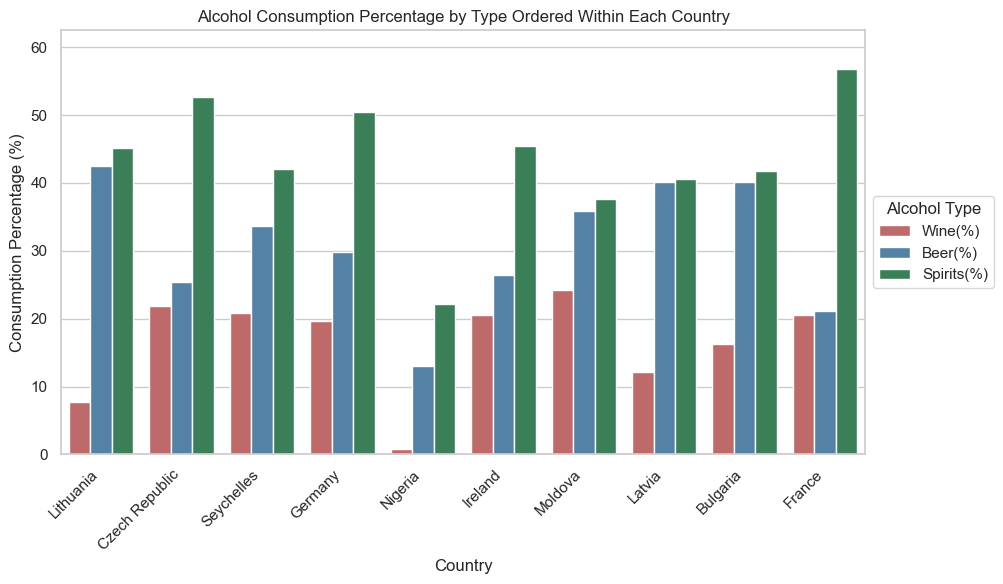

In [1095]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Selecting top 10 countries
subset_data = merged_wiki_df.head(10)

# Melting to long format
df_melt = subset_data.melt(id_vars="Country", 
                           value_vars=["Beer(%)", "Wine(%)", "Spirits(%)"],
                           var_name="Alcohol_Type",
                           value_name="Consumption_Percentage")

df_melt['Consumption_Percentage'] = pd.to_numeric(df_melt['Consumption_Percentage'], errors='coerce')

# Ranking alcohol types per country by ascending consumption
df_melt['Rank'] = df_melt.groupby('Country')['Consumption_Percentage'].rank(method='first').astype(int)

# Using first country to determine color mapping for ranks
first_country = subset_data.iloc[0]['Country']
first_country_data = df_melt[df_melt['Country'] == first_country].sort_values('Rank')
rank_to_alcohol = dict(zip(first_country_data['Rank'], first_country_data['Alcohol_Type']))
alcohol_to_color = {'Beer(%)': 'steelblue', 'Wine(%)': 'indianred', 'Spirits(%)': 'seagreen'}
palette_rank = {rank: alcohol_to_color[alc] for rank, alc in rank_to_alcohol.items()}

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(data=df_melt, x='Country', y='Consumption_Percentage', hue='Rank', palette=palette_rank)

plt.ylim(0, df_melt['Consumption_Percentage'].max() * 1.1)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Consumption Percentage (%)")
plt.title("Alcohol Consumption Percentage by Type Ordered Within Each Country")

# Creating legend using alcohol names (instead of 1,2,3)
handles, _ = plt.gca().get_legend_handles_labels()
legend_labels = [rank_to_alcohol[r] for r in sorted(palette_rank.keys())]

plt.legend(handles, legend_labels, title="Alcohol Type", loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## Step 4: Merge Data from Multiple Sources Using SQL JOINs

In this step, I combine data from the flat file, Wikipedia, and API datasets by performing SQL JOIN operations.

The flat_file_data and api_data tables use the SpatialDim column to represent locations.

The Wikipedia dataset uses a Country column with country names.

To unify these sources, I join the flat file and API tables with the Wikipedia data by mapping the SpatialDim codes to the corresponding country names. This allows linking structured indicator data from the flat file and API with alcohol consumption percentages from Wikipedia.

The merged result provides a comprehensive dataset combining multiple data dimensions, which I then load into a pandas DataFrame for further analysis and visualization.

#### The country code to country name mapping with pycountry package.

In [1096]:
import pycountry

def get_country_name_from_code(code):
    try:
        country = pycountry.countries.get(alpha_3=code)
        if country:
            return country.name
        country = pycountry.countries.get(alpha_2=code)
        if country:
            return country.name
    except:
        return None
    return None

code_to_country_df = pd.DataFrame({
    'SpatialDim': flat_file_df['SpatialDim'].unique()
})

code_to_country_df['Country'] = code_to_country_df['SpatialDim'].apply(get_country_name_from_code)

In [1097]:
# Merging flat file with country names
flat_with_country = flat_file_df.merge(code_to_country_df, on='SpatialDim', how='left')

# Merging API data with country names
api_with_country = api_df.merge(code_to_country_df, on='SpatialDim', how='left')

# Merging flat and API datasets
flat_api_merged = flat_with_country.merge(api_with_country, on=['SpatialDim', 'Country'], how='outer', suffixes=('_flat', '_api'))

# Checking structure of df_countries before merging
print(df_countries.columns)
print(df_countries['Country'].head())

# Merging the above with Wikipedia data (df_countries)
final_merged_df = flat_api_merged.merge(df_countries, on='Country', how='left')

# Displaying first few rows of the fully merged dataset
print(final_merged_df.head())

Index(['Country', 'Alcohol_1996', 'Alcohol_2016', 'Alcohol_2019'], dtype='object')
0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country, dtype: object
   Id_flat IndicatorCode_flat SpatialDim TimeDimType_flat  \
0   177655      WHOSIS_000001        AFG             YEAR   
1   177655      WHOSIS_000001        AFG             YEAR   
2   177655      WHOSIS_000001        AFG             YEAR   
3   177655      WHOSIS_000001        AFG             YEAR   
4   177655      WHOSIS_000001        AFG             YEAR   

  ParentLocationCode_flat  TimeDim_flat Dim2Type_flat Dim2_flat Dim3Type_flat  \
0                     EMR          2011       Unknown   Unknown       Unknown   
1                     EMR          2011       Unknown   Unknown       Unknown   
2                     EMR          2011       Unknown   Unknown       Unknown   
3                     EMR          2011       Unknown   Unknown       Unknown   
4                     EMR      

### Step 5: Visualizing the Relationship Between Alcohol Consumption and Health Indicator

To explore potential relationships between alcohol consumption and health outcomes, I created a horizontal bar chart comparing average alcohol consumption per capita with a WHO health indicator, for the year 2019. This health indicator is constructed such that higher values reflect poorer health outcomes, including lower life expectancy or diminished well-being.

For this analysis, the dataset was filtered to include countries with available data for both alcohol consumption and the health indicator. The top 22 countries with the highest alcohol consumption were selected to highlight where heavier drinking may or may not align with worse health indicators.

This visualization helps evaluate whether greater alcohol use across countries correlates with worse health, or if other patterns and outliers emerge.

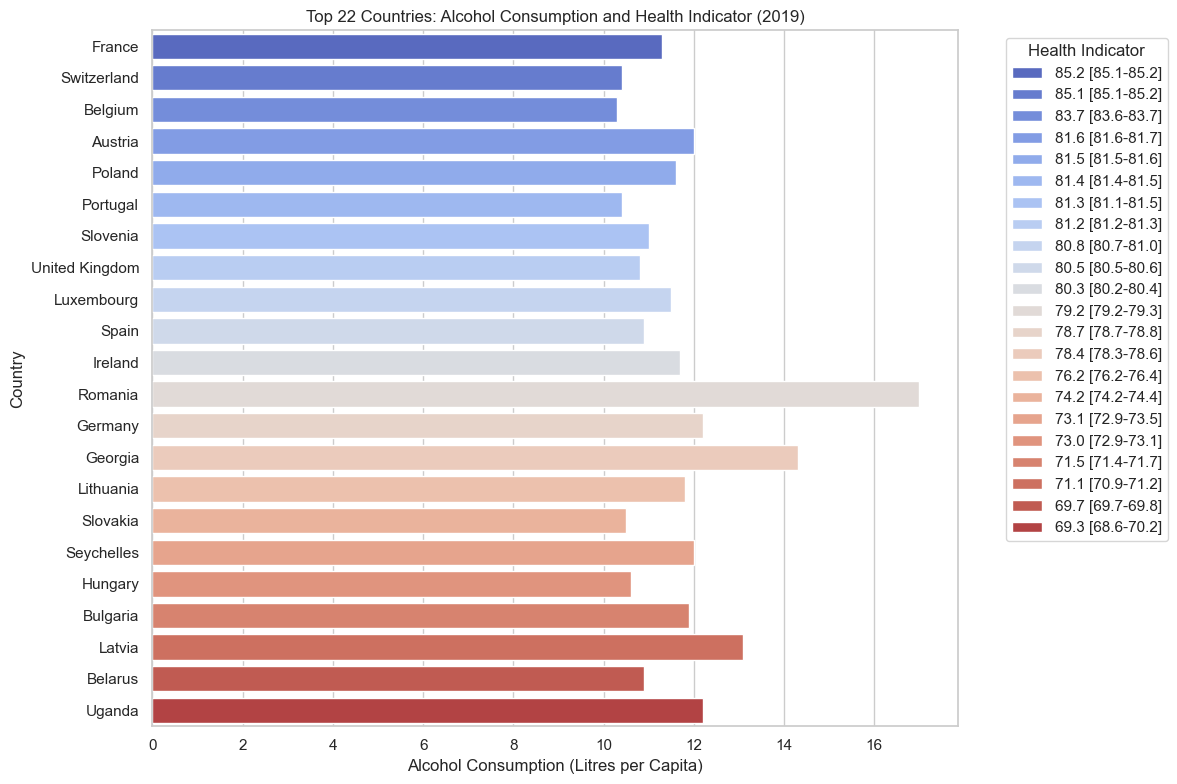

In [1098]:
import matplotlib.pyplot as plt
import seaborn as sns

# Renaming columns for clarity
viz_df = viz_df.rename(columns={
    'Alcohol_2019': 'Alcohol_Consumption',
    'Value_api': 'Health_Indicator'
})

# Filtering for year 2019 records only
viz_df_2019 = viz_df[viz_df['TimeDim_api'] == 2019]

# Dropping duplicates to keep one record per country
viz_df_latest = viz_df_2019.drop_duplicates(subset='Country', keep='first')

# Sorting and select top 22 countries by alcohol consumption
viz_df_top = viz_df_latest.sort_values(by='Alcohol_Consumption', ascending=False).head(22)

# Sorting these by Health Indicator in descending order
viz_df_top_sorted = viz_df_top.sort_values(by='Health_Indicator', ascending=False)

# Plotting as horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=viz_df_top_sorted,
    x='Alcohol_Consumption',
    y='Country',
    hue='Health_Indicator',
    dodge=False,
    palette='coolwarm'
)

plt.title('Top 22 Countries: Alcohol Consumption and Health Indicator (2019)')
plt.xlabel('Alcohol Consumption (Litres per Capita)')
plt.ylabel('Country')
plt.legend(title='Health Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Interpretation:

The visualization reveals that there is no clear or consistent relationship between alcohol consumption per capita and the health indicator, where higher values indicate worse health. For example, France does not have the highest alcohol consumption, yet it has the highest health indicator value (85.2), indicating worse health. On the other hand, Romania has the highest alcohol consumption among the countries analyzed, but its health indicator is lower (79.2), suggesting better health compared to France.

Additionally, countries like Austria and Seychelles both report alcohol consumption of 12 liters per capita, yet their health indicators differ significantly — 81.6 for Austria versus 73.1 for Seychelles. These inconsistencies suggest that alcohol consumption alone is not a reliable predictor of the selected health outcome, and that other variables such as healthcare access, socioeconomic factors, diet, and environment likely play a more influential role in determining a country’s overall health.

### Step 6: Correlation Analysis

To evaluate the linear relationship between alcohol consumption and a selected health indicator, I calculated the Pearson correlation coefficient and created a regression plot for the year 2019. This approach helps quantify the strength and direction of the association between alcohol use (measured in liters per capita) and overall health outcomes (as indicated by the WHO metric used in this analysis).

Since higher values of the Health Indicator correspond to worse health outcomes, a positive correlation would suggest that increased alcohol consumption is associated with declining health at the population level. This step provides both statistical and visual insight into whether alcohol use might play a meaningful role in national health trends.

Number of rows after cleaning: 156
Correlation between Alcohol Consumption and Health Indicator: 0.38


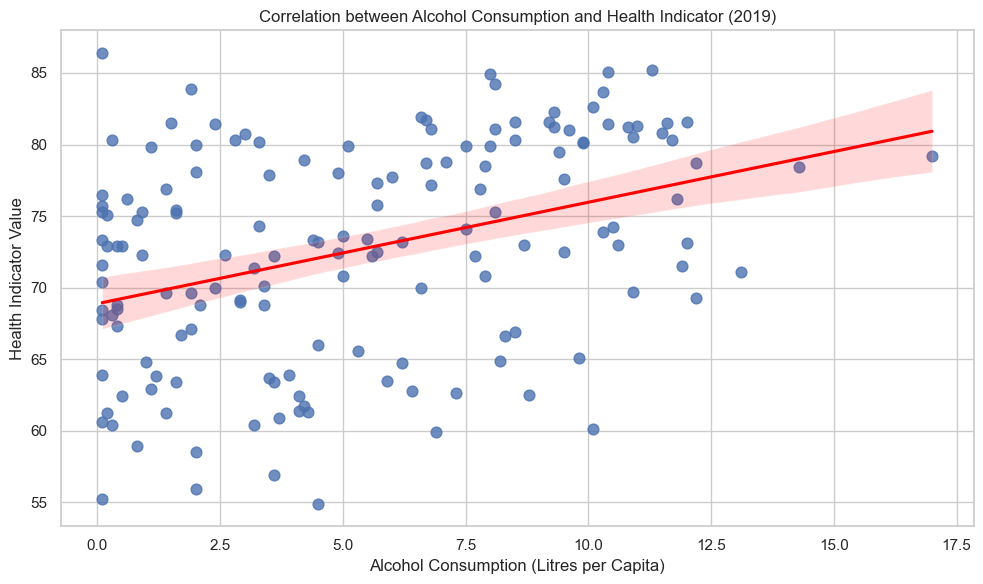

In [1099]:
# Filtering for year 2019
viz_df_2019 = viz_df[viz_df['TimeDim_api'] == 2019]

# Dropping duplicates
viz_df_latest = viz_df_2019.drop_duplicates(subset='Country', keep='first')

# Removing rows where Health_Indicator is missing or empty
viz_df_latest = viz_df_latest[viz_df_latest['Health_Indicator'].notna() & (viz_df_latest['Health_Indicator'] != '')]

# Extracting numeric part and convert to float
viz_df_latest['Health_Indicator'] = viz_df_latest['Health_Indicator'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)

# Preparing correlation DataFrame
corr_df = viz_df_latest[['Alcohol_Consumption', 'Health_Indicator']].dropna()

print(f"Number of rows after cleaning: {len(corr_df)}")

# Computing correlation
correlation = corr_df.corr().iloc[0, 1]
print(f"Correlation between Alcohol Consumption and Health Indicator: {correlation:.2f}")

# Plotting regression
plt.figure(figsize=(10, 6))
sns.regplot(data=corr_df, x='Alcohol_Consumption', y='Health_Indicator', scatter_kws={"s": 60}, line_kws={"color": "red"})
plt.title('Correlation between Alcohol Consumption and Health Indicator (2019)')
plt.xlabel('Alcohol Consumption (Litres per Capita)')
plt.ylabel('Health Indicator Value')
plt.tight_layout()
plt.show()

### Interpretation:

The calculated correlation coefficient is 0.38, or 38%, indicating a moderate positive relationship between alcohol consumption and the Health Indicator. Although not a strong correlation, this trend suggests that countries with higher alcohol consumption generally exhibit worse health outcomes (since higher indicator values correspond to poorer health).

While this does not imply causation, it highlights a relationship worth monitoring. The upward-sloping regression line in the plot visually reinforces this trend. These findings suggest that excessive alcohol consumption may negatively impact public health and should be considered a relevant factor in health policy discussions.

### Step 7: Top 10 Countries by Alcohol Consumption

Using visualization to show top 10 countries with the highest alcohol consumption, helping identify potential outliers or public health focus areas.

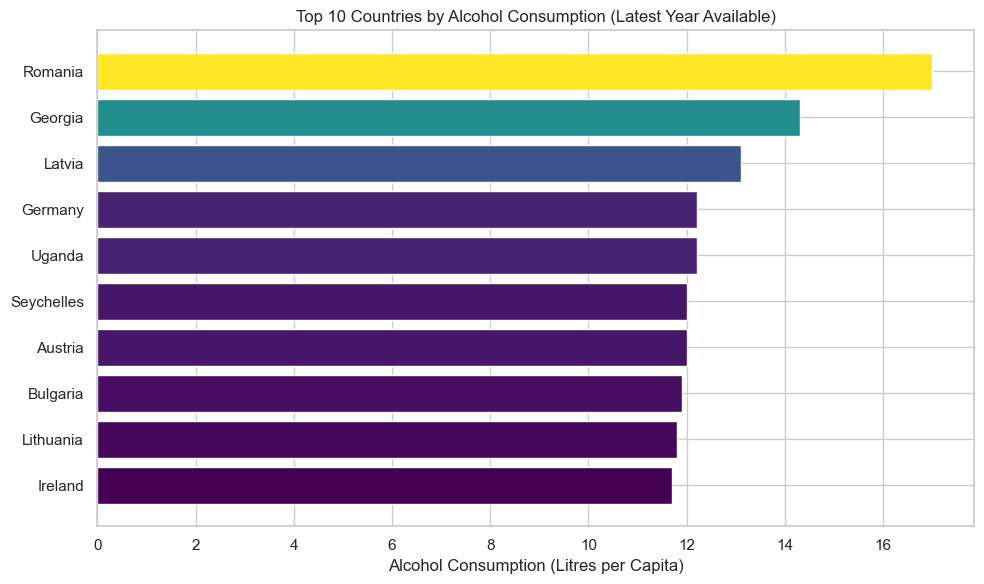

In [1100]:
# Getting the latest available year per country
alcohol_latest = viz_df.sort_values('TimeDim_api', ascending=False).drop_duplicates(subset='Country', keep='first')

# Dropping rows where Alcohol_Consumption is NaN
alcohol_latest = alcohol_latest[alcohol_latest['Alcohol_Consumption'].notna()]

# Getting the top 10 countries by Alcohol Consumption
top10_alcohol = alcohol_latest.sort_values('Alcohol_Consumption', ascending=False).head(10)

# Sorting for clean plotting
top10_alcohol = top10_alcohol.sort_values('Alcohol_Consumption', ascending=True)

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=top10_alcohol['Alcohol_Consumption'].min(), vmax=top10_alcohol['Alcohol_Consumption'].max())
colors = cm.viridis(norm(top10_alcohol['Alcohol_Consumption']))

plt.figure(figsize=(10, 6))
plt.barh(top10_alcohol['Country'], top10_alcohol['Alcohol_Consumption'], color=colors)
plt.xlabel('Alcohol Consumption (Litres per Capita)')
plt.title('Top 10 Countries by Alcohol Consumption (Latest Year Available)')
plt.tight_layout()
plt.show()

### Interpretation from the result:

By plotting the top 10 countries by alcohol consumption, we can see that Romania has the highest consumption at 17 litres per capita annually. Georgia ranks second with approximately 14.3 litres, and Latvia comes in third with about 13 litres. On the lower end, Ireland has the lowest alcohol consumption among the top 10, at approximately 11.8 litres per capita per year.

To put this in perspective, Romania’s 17 litres per year breaks down to roughly 1.42 litres per month, which is a significant amount and could be considered unhealthy for an individual’s health.

### Step 8: Visualize the Relationship Between Alcohol Consumption and Health Indicator

In this step, I categorize countries into four alcohol consumption levels: Low, Medium, High, and Very High, based on their annual per capita alcohol intake. I then use a box plot to explore how the Health Indicator varies across these categories.

The goal is to determine whether countries with higher alcohol consumption levels tend to exhibit better or worse health outcomes, as reflected by the Health Indicator, where higher values indicate poorer health.

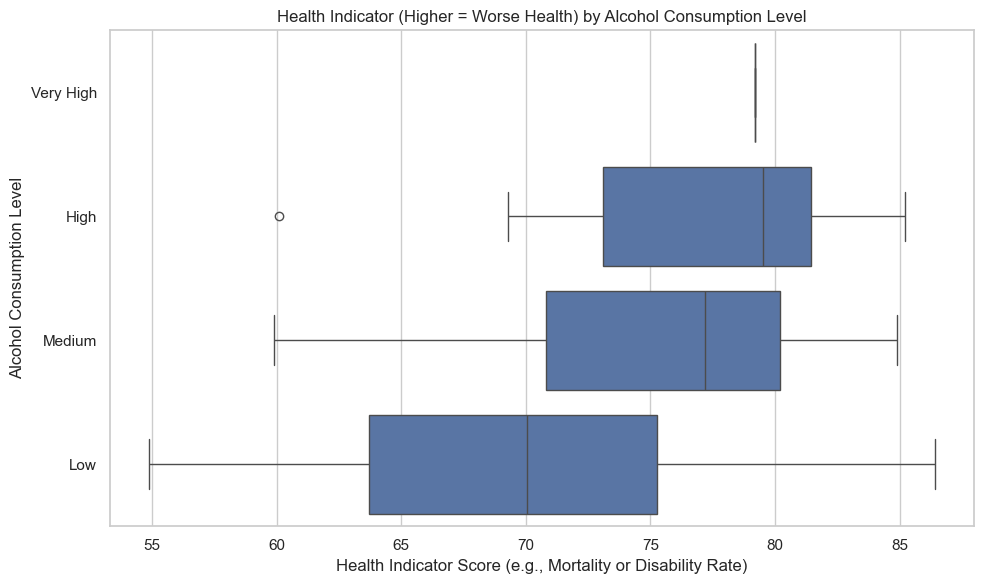

In [1101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Defining bins and labels for alcohol consumption levels
bins = [0, 5, 10, 15, 20]
labels = ['Low', 'Medium', 'High', 'Very High']
viz_df_latest['Alcohol_Level'] = pd.cut(
    viz_df_latest['Alcohol_Consumption'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)

# Ensuring the Alcohol_Level column is treated as an ordered categorical variable
viz_df_latest['Alcohol_Level'] = pd.Categorical(
    viz_df_latest['Alcohol_Level'], 
    categories=labels, 
    ordered=True
)

# Creating a horizontal boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=viz_df_latest, y='Alcohol_Level', x='Health_Indicator', orient='h')

# Flipping y-axis so Low consumption is at bottom, Very High at top
plt.gca().invert_yaxis()

# Updating labels and title for clarity
plt.title('Health Indicator (Higher = Worse Health) by Alcohol Consumption Level')
plt.xlabel('Health Indicator Score (e.g., Mortality or Disability Rate)')
plt.ylabel('Alcohol Consumption Level')
plt.tight_layout()
plt.show()

### Interpretation:

The boxplot reveals a noticeable trend: countries with higher alcohol consumption levels tend to have higher health indicator scores.

Since the Health Indicator in this dataset is defined such that higher values correspond to worse health outcomes (e.g., increased mortality or disability), this suggests that increased alcohol consumption is associated with poorer health.

This result aligns with general expectations and existing public health research, reinforcing the link between excessive alcohol intake and negative health effects at the population level.

### Project Summary and Ethical Reflection

In this milestone, I merged data from three sources: a flat file, Wikipedia, and the WHO API. After transforming and cleaning each dataset, I used SQLite and pandas to join them using SQL-style operations. One of the main challenges was aligning country information across datasets. The flat file and API used ISO codes, while Wikipedia listed full country names. I used the `pycountry` package to map country codes to names, allowing me to merge on a consistent `Country` column.

Once merged, I explored and visualized trends across the datasets. For example, I examined how alcohol consumption (from Wikipedia) related to life expectancy and health indicators (from WHO). This helped confirm patterns and supported the data transformations I applied.

Ethically, transforming and merging data requires careful consideration. For instance, mapping codes to country names involved assumptions about accuracy and completeness. I also dropped rows with missing values in earlier steps, which might have introduced bias or excluded edge cases. These are small changes, but they can affect downstream analysis.

Since the data came from public sources like WHO and Wikipedia, there were no major legal concerns. However, if the data included personal health information, steps like anonymization and compliance with data protection laws (e.g., HIPAA, GDPR) would be essential.

One key risk is misinterpretation when combining data collected with different standards or methodologies. I assumed compatibility between WHO indicators and alcohol consumption data, which may not be exact. If this were for policy or research, I would document all assumptions clearly.

Overall, this project highlighted the importance of transparency and ethics in data processing, even with public datasets.